## ================================ PT. 3 ================================
#  >>>>>>>>>>>>>>>>>>>> MACHINE LEARNING <<<<<<<<<<<<<<<<<<<<
## =====================================================================

In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Time-Series Machine Learning on 2011-2019 Data
### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# Regression for Dataset 2
###  –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [9]:
BusMRTGeoData = pd.read_csv('BusMRTGeoData.csv')
BusMRTGeoData

,SUBZONE_N,AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK,AVG_TAP_IN_TAP_OUT_VOLUME_PEAK,AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY,PEAK_HOUR_PERCENTAGE,WEEKDAY_PERCENTAGE,"('2020', 'Male Percentage')","('2020', '00 - 19')","('2020', '20 - 39')","('2020', '40 - 59')","('2020', '60 & Over')","('2020', 'Average Income')"
0,ALJUNIED,477236.0,2649777.0,2670371.0,15454280.0,0.171459,0.863958,0.493623,6150,10720,12170,10940,11730.102220
1,ANAK BUKIT,147583.0,818550.0,849757.0,4909818.0,0.166717,0.865365,0.474166,4280,5660,6190,5750,19739.484317
2,ANCHORVALE,122622.0,674735.0,811713.0,4596871.0,0.146781,0.882897,0.492519,13550,14460,13710,6410,10559.805071
3,BEDOK NORTH,700065.0,3896305.0,4425740.0,25472206.0,0.152963,0.868739,0.485093,13230,20760,24610,23260,8815.353975
4,BEDOK RESERVOIR,155476.0,854617.0,878224.0,5012083.0,0.170511,0.876107,0.489988,5280,6820,7960,5420,12406.950807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,WOODLANDS EAST,572727.0,3126930.0,3289376.0,18614145.0,0.167987,0.883569,0.499949,23130,30470,31480,13910,9709.300993
82,WOODLANDS WEST,254941.0,1409087.0,1579596.0,8975706.0,0.156989,0.879929,0.508994,6220,10300,9840,7560,7374.195426
83,YEW TEE,302951.0,1653555.0,1746928.0,9926964.0,0.166572,0.879890,0.497771,8460,11480,13730,6730,11017.340267
84,YIO CHU KANG,288341.0,1520813.0,1365389.0,7430472.0,0.204672,0.918777,NaN,0,0,0,0,NaN


In [99]:
BusMRTGeoData_reg = BusMRTGeoData.filter(['SUBZONE_N', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', 'PEAK_HOUR_PERCENTAGE', 'WEEKDAY_PERCENTAGE', "('2020', 'Male Percentage')", "('2020', '00 - 19')", "('2020', '20 - 39')", "('2020', '40 - 59')", "('2020', '60 & Over')", "('2020', 'Average Income')"], axis = 1)
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', 'Male Percentage')": 'Male Percentage'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '00 - 19')": '00 - 19'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '20 - 39')": '20 - 39'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '40 - 59')": '40 - 59'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '60 & Over')": '60 & Over'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', 'Average Income')": 'Average Income'})
BusMRTGeoData_reg['Male Percentage'] = BusMRTGeoData_reg['Male Percentage'].replace(np.nan, 0) #Replace '-' with '0'
BusMRTGeoData_reg['Average Income'] = BusMRTGeoData_reg['Average Income'].replace(np.nan, 0) #Replace '-' with '0'
BusMRTGeoData_reg

,SUBZONE_N,AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY,PEAK_HOUR_PERCENTAGE,WEEKDAY_PERCENTAGE,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income
0,ALJUNIED,15454280.0,0.171459,0.863958,0.493623,6150,10720,12170,10940,11730.102220
1,ANAK BUKIT,4909818.0,0.166717,0.865365,0.474166,4280,5660,6190,5750,19739.484317
2,ANCHORVALE,4596871.0,0.146781,0.882897,0.492519,13550,14460,13710,6410,10559.805071
3,BEDOK NORTH,25472206.0,0.152963,0.868739,0.485093,13230,20760,24610,23260,8815.353975
4,BEDOK RESERVOIR,5012083.0,0.170511,0.876107,0.489988,5280,6820,7960,5420,12406.950807
...,...,...,...,...,...,...,...,...,...,...
81,WOODLANDS EAST,18614145.0,0.167987,0.883569,0.499949,23130,30470,31480,13910,9709.300993
82,WOODLANDS WEST,8975706.0,0.156989,0.879929,0.508994,6220,10300,9840,7560,7374.195426
83,YEW TEE,9926964.0,0.166572,0.879890,0.497771,8460,11480,13730,6730,11017.340267
84,YIO CHU KANG,7430472.0,0.204672,0.918777,0.000000,0,0,0,0,0.000000


### Variable 1: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using PEAK_HOUR_PERCENTAGE

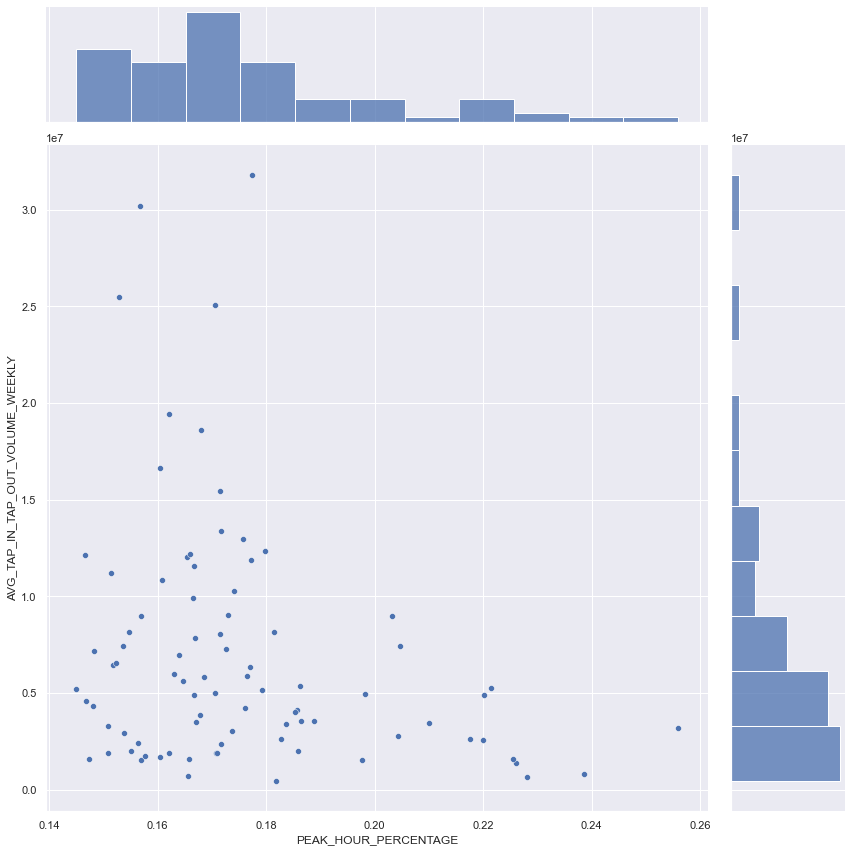

In [11]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'PEAK_HOUR_PERCENTAGE', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [12]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['PEAK_HOUR_PERCENTAGE'])

-0.2516931050720493

In [13]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['PEAK_HOUR_PERCENTAGE'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (21, 1) (21, 1)
Test Set  : (65, 1) (65, 1)


In [14]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [15]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [11735115.78101644]
Coefficients 	: a =  [[-23631422.05924829]]


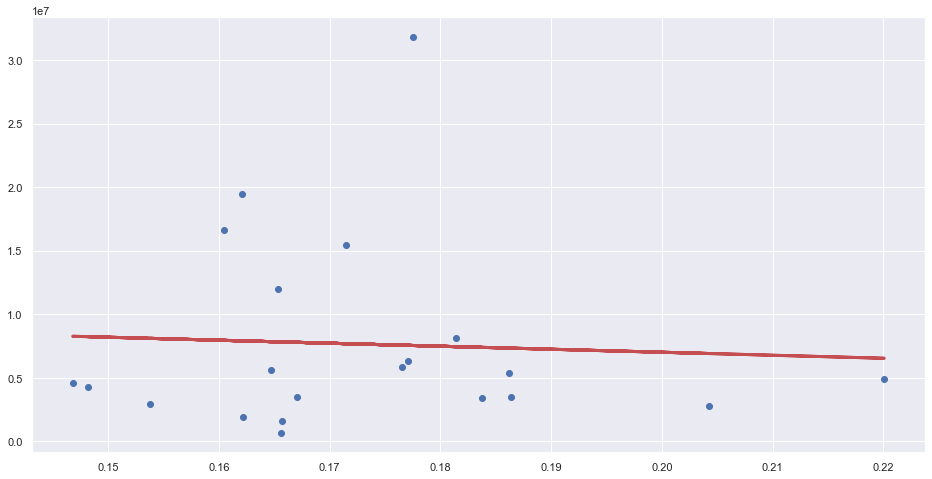

In [16]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [17]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

Explained Variance (R^2) 	: 0.0029944956858383165


In [18]:
# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 54198128554726.32


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `PEAK_HOUR_PERCENTAGE` in the Test dataset.

In [19]:
y_test_pred = linreg.predict(X_test)

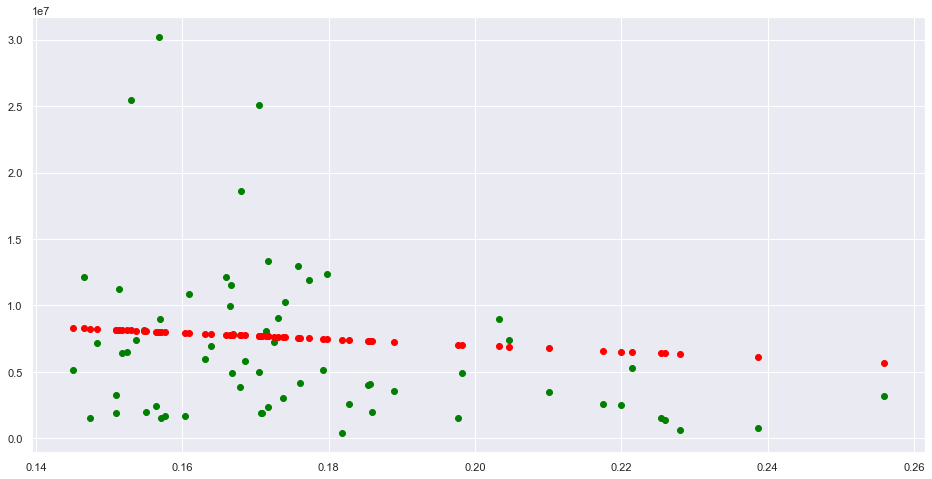

In [20]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [21]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

Explained Variance (R^2) 	: 0.03236530566359164


In [22]:
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 34117322903666.75


### Variable 2: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using WEEKDAY_PERCENTAGE

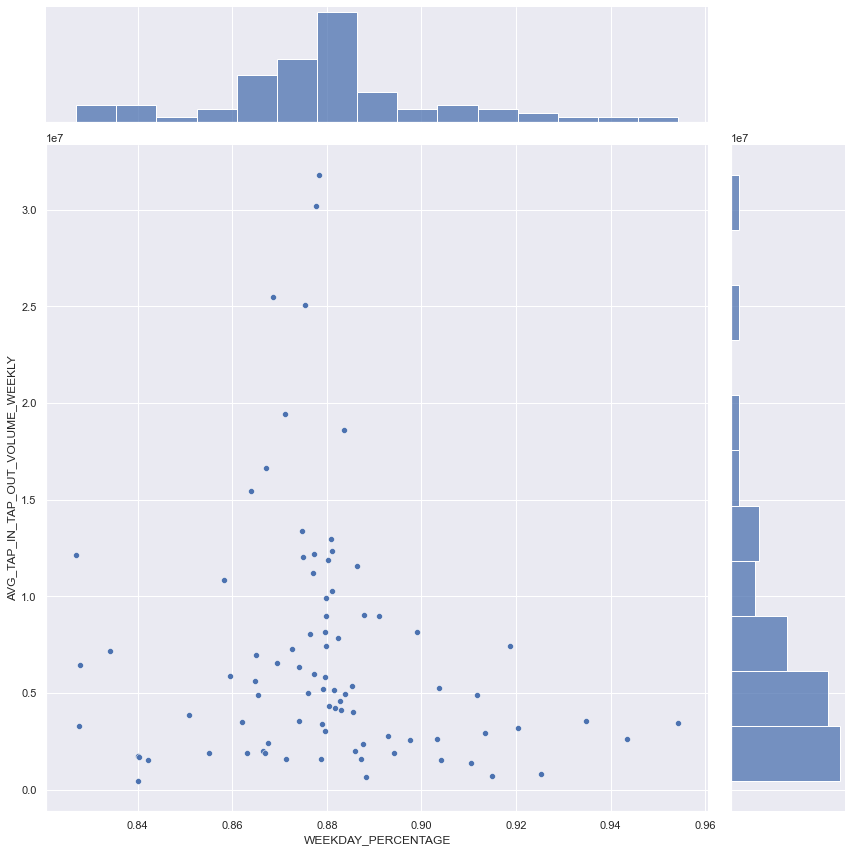

In [23]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'WEEKDAY_PERCENTAGE', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [24]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['WEEKDAY_PERCENTAGE'])

-0.1295248744933444

In [25]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['WEEKDAY_PERCENTAGE'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (21, 1) (21, 1)
Test Set  : (65, 1) (65, 1)


In [26]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [27]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [31546937.67360049]
Coefficients 	: a =  [[-28157592.51417654]]


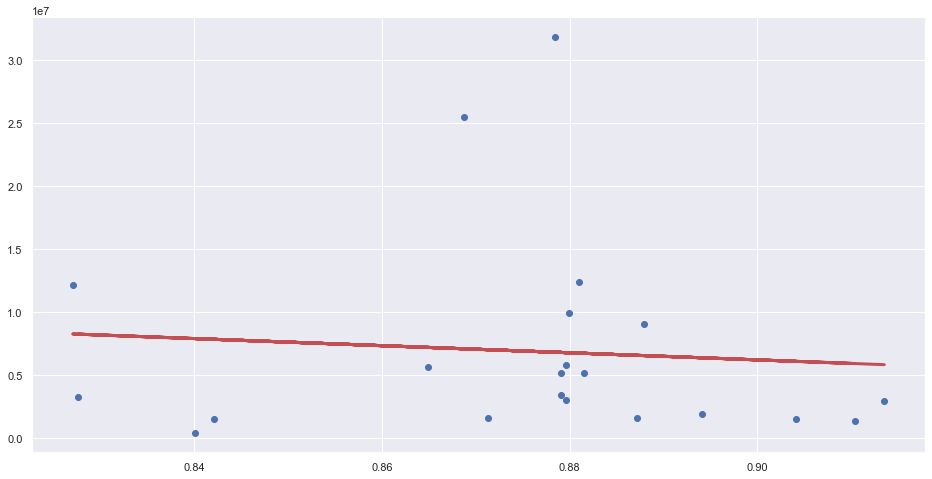

In [28]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [29]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

Explained Variance (R^2) 	: 0.006927923302521344


In [30]:
# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 62044097682961.8


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `WEEKDAY_PERCENTAGE` in the Test dataset.

In [31]:
y_test_pred = linreg.predict(X_test)

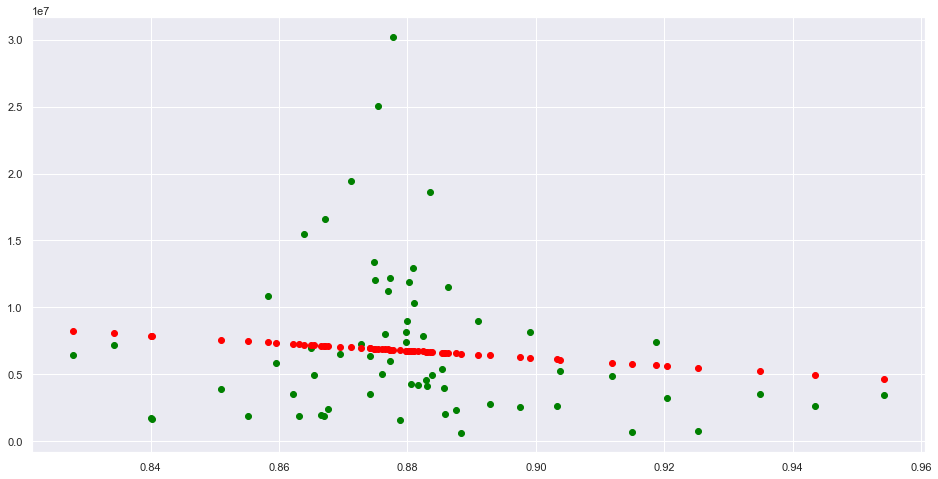

In [32]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [33]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

Explained Variance (R^2) 	: 0.020335911748182278


In [34]:
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 32170298550325.168


### Variable 3: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using Male Percentage

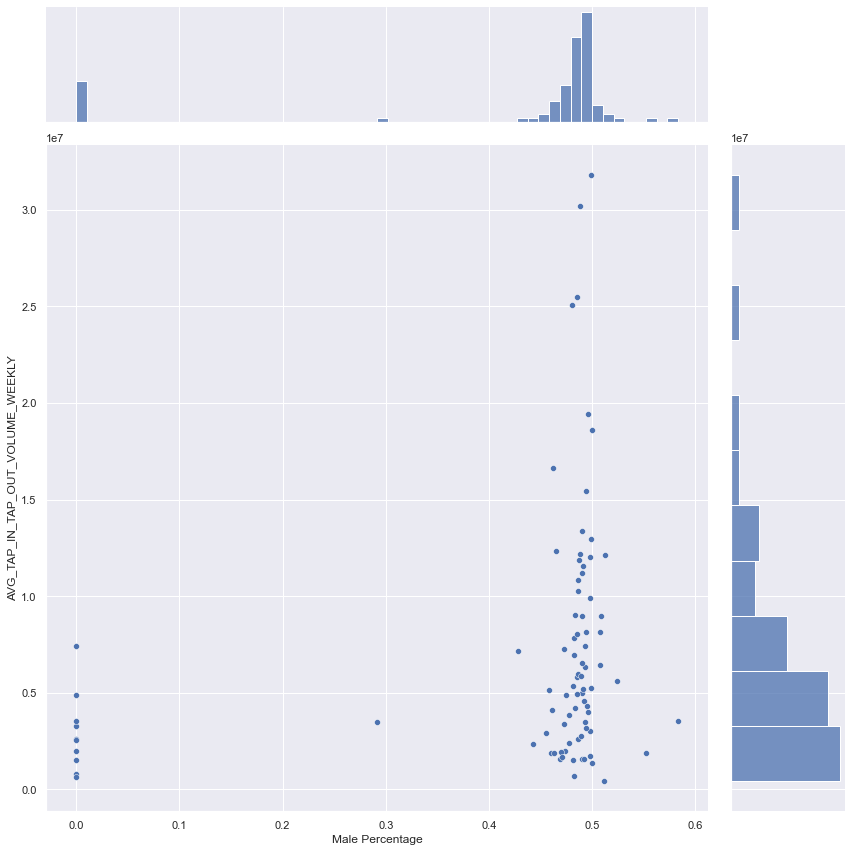

In [35]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Male Percentage', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [36]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Male Percentage'])

0.24232609709596914

In [37]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Male Percentage'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (21, 1) (21, 1)
Test Set  : (65, 1) (65, 1)


In [38]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [39]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [2923359.70977085]
Coefficients 	: a =  [[10575814.80063094]]


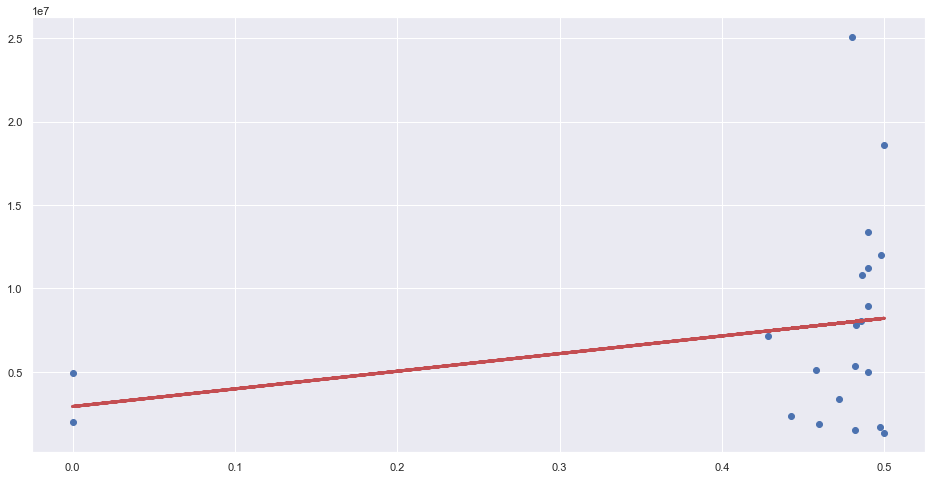

In [40]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [41]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

Explained Variance (R^2) 	: 0.0631767979364174


In [42]:
# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 33436129670998.6


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Male Percentage` in the Test dataset.

In [43]:
y_test_pred = linreg.predict(X_test)

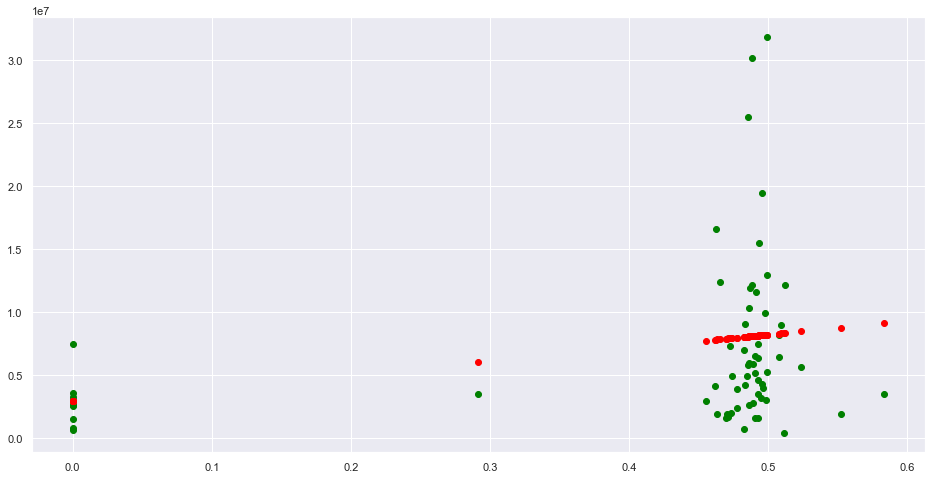

In [44]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [45]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

Explained Variance (R^2) 	: 0.04613836749720923


In [46]:
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 39456217877654.7


### Variable 4: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using 00 - 19

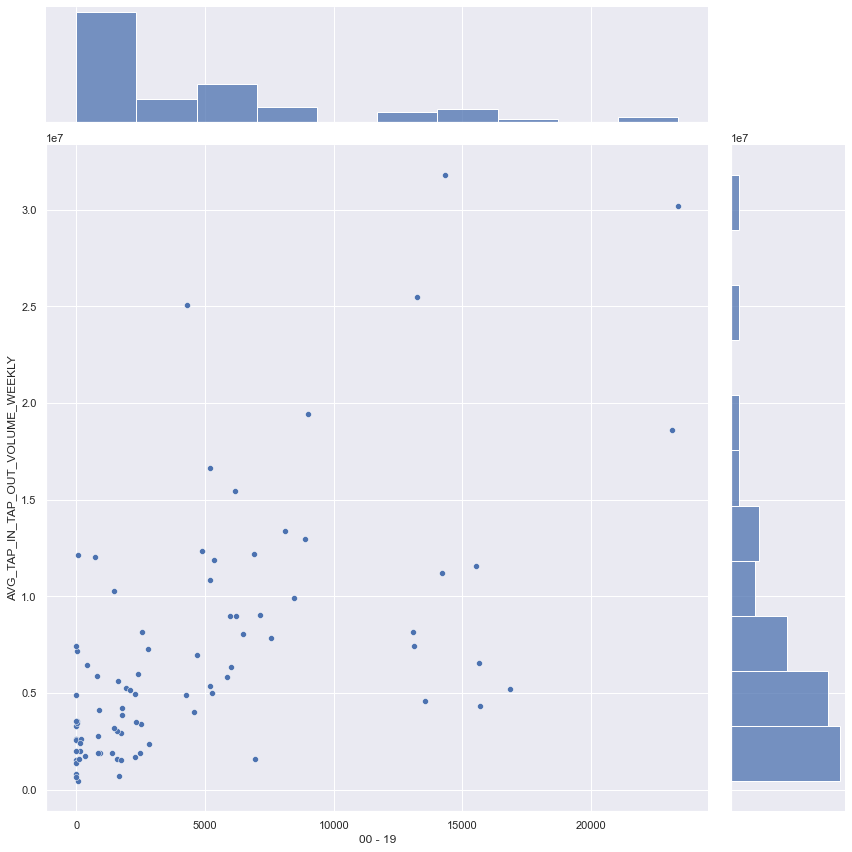

In [47]:
sb.jointplot(data = BusMRTGeoData_reg, x = '00 - 19', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [48]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['00 - 19'])

0.6164596239700507

In [49]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['00 - 19'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (21, 1) (21, 1)
Test Set  : (65, 1) (65, 1)


In [50]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [51]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3456646.64995906]
Coefficients 	: a =  [[978.80526381]]


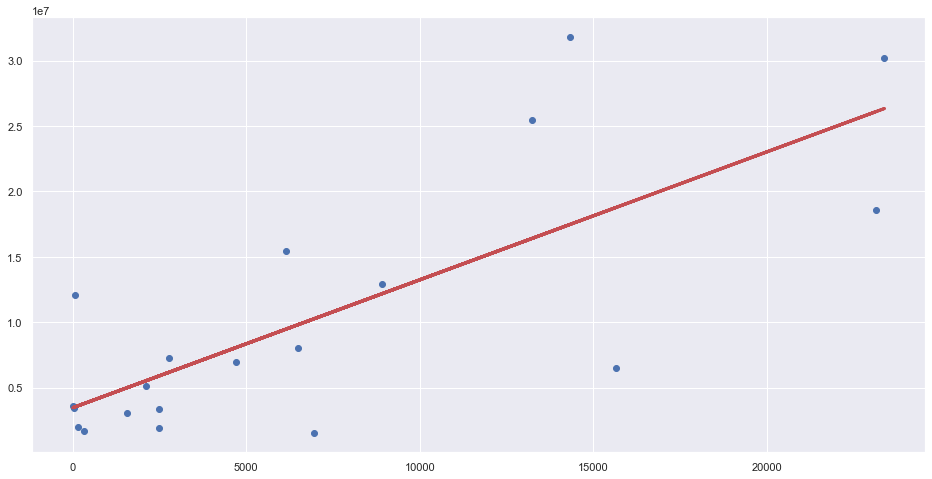

In [52]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [53]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

Explained Variance (R^2) 	: 0.5893384746925285


In [54]:
# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 34844806647824.34


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `00 - 19` in the Test dataset.

In [55]:
y_test_pred = linreg.predict(X_test)

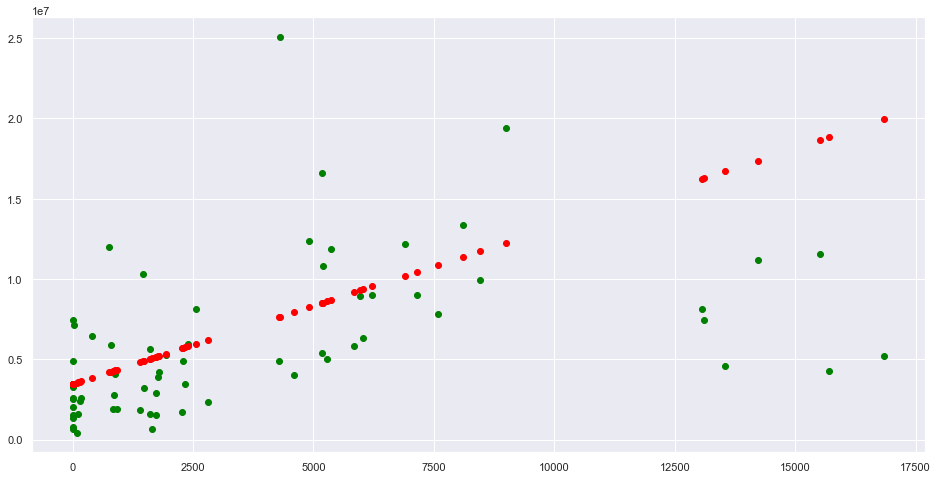

In [56]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [57]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

Explained Variance (R^2) 	: -0.13293538750822287


In [58]:
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 25268223540305.11


### Variable 5: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using 20 - 39

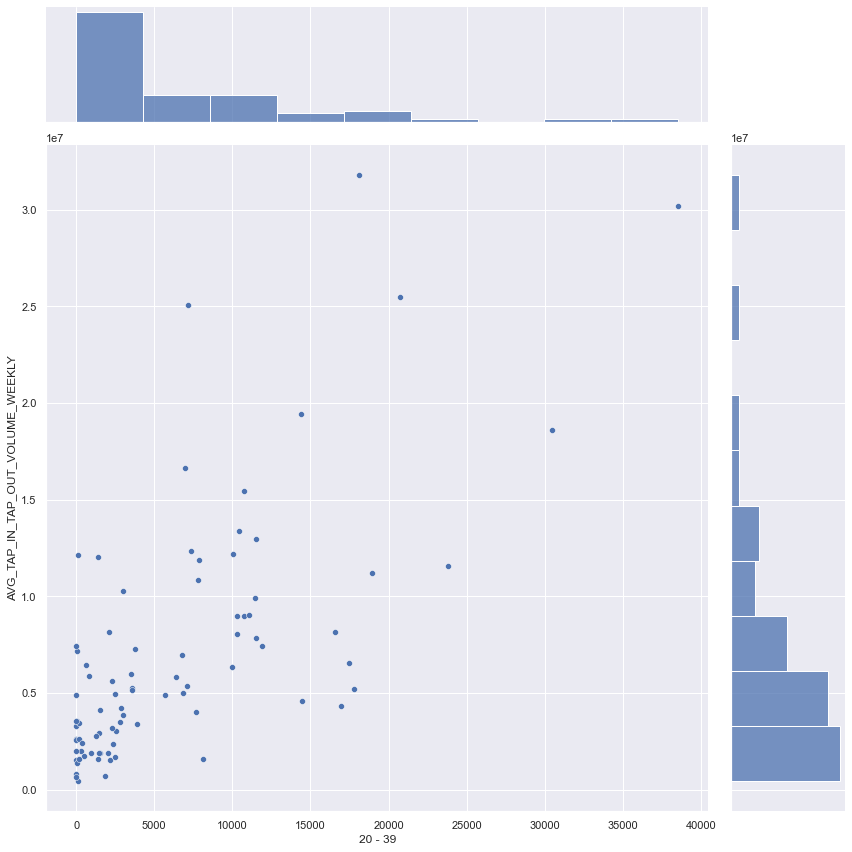

In [59]:
sb.jointplot(data = BusMRTGeoData_reg, x = '20 - 39', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [60]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['20 - 39'])

0.6952759625021925

In [61]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['20 - 39'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (21, 1) (21, 1)
Test Set  : (65, 1) (65, 1)


In [62]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [63]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [2387866.51500057]
Coefficients 	: a =  [[573.10970862]]


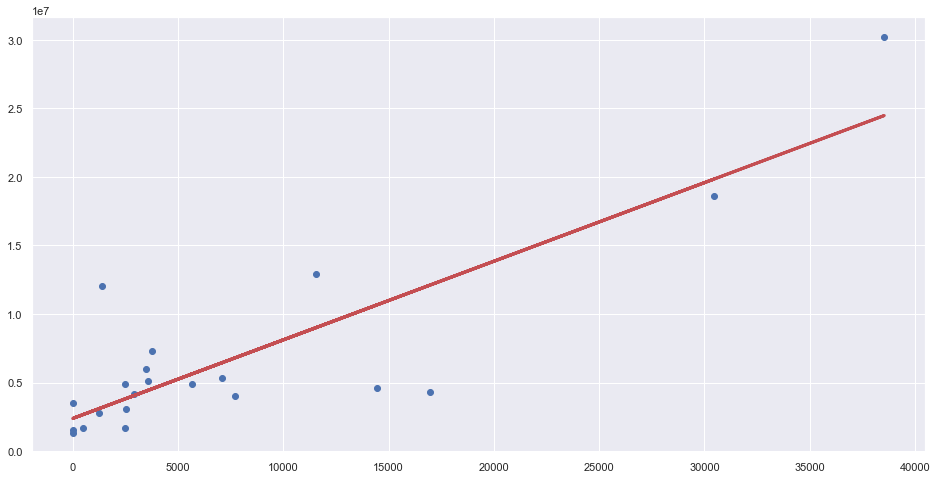

In [64]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [65]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

Explained Variance (R^2) 	: 0.7278758345812325


In [66]:
# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 12179881184789.557


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `20 - 39` in the Test dataset.

In [67]:
y_test_pred = linreg.predict(X_test)

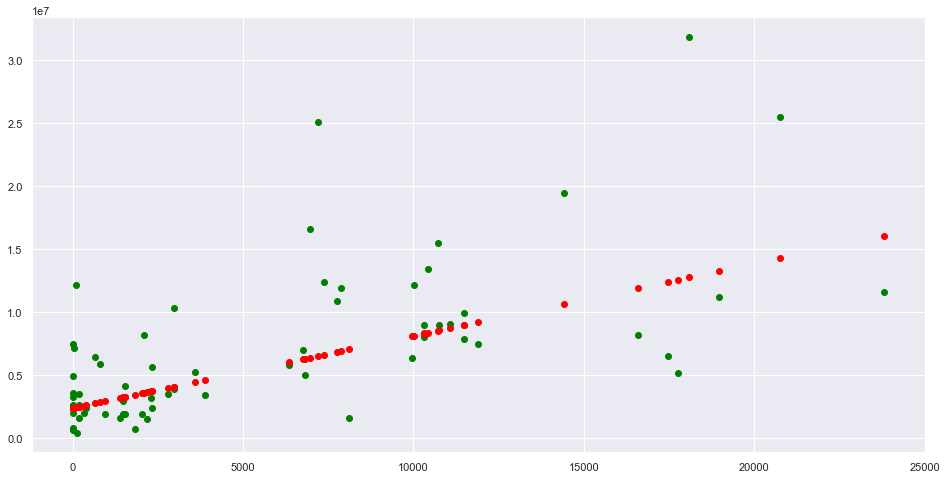

In [68]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [69]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

Explained Variance (R^2) 	: 0.35276257177358206


In [70]:
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 24935940221605.18


### Variable 6: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using 40 - 59

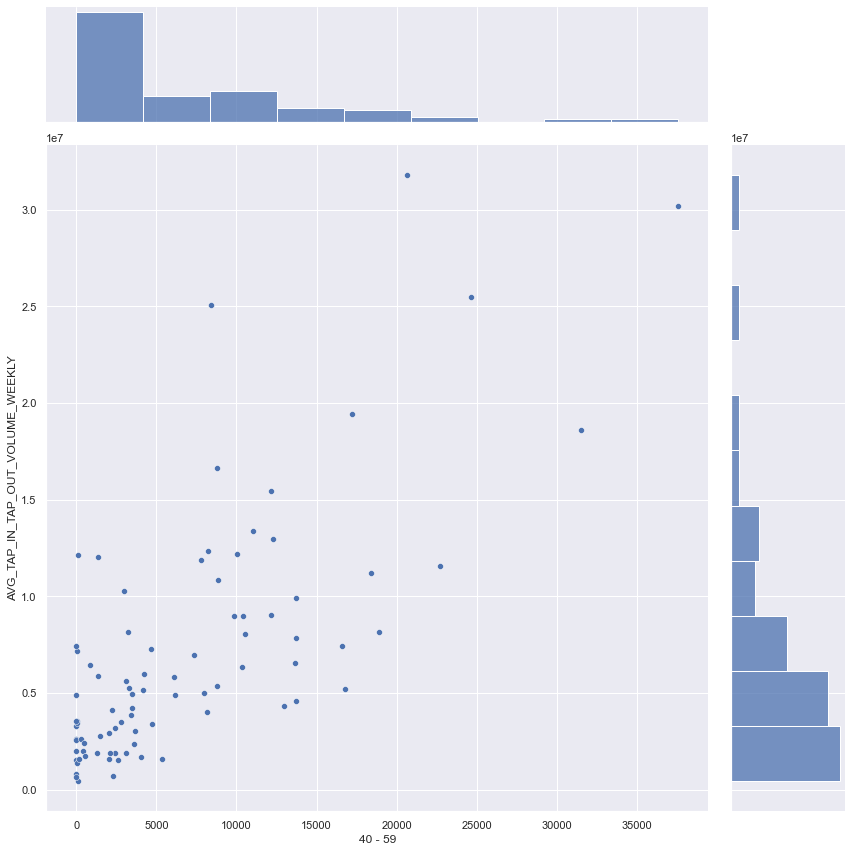

In [71]:
sb.jointplot(data = BusMRTGeoData_reg, x = '40 - 59', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [72]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['40 - 59'])

0.7356997525223683

In [73]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['40 - 59'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (21, 1) (21, 1)
Test Set  : (65, 1) (65, 1)


In [74]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [75]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3153646.79882008]
Coefficients 	: a =  [[461.06795765]]


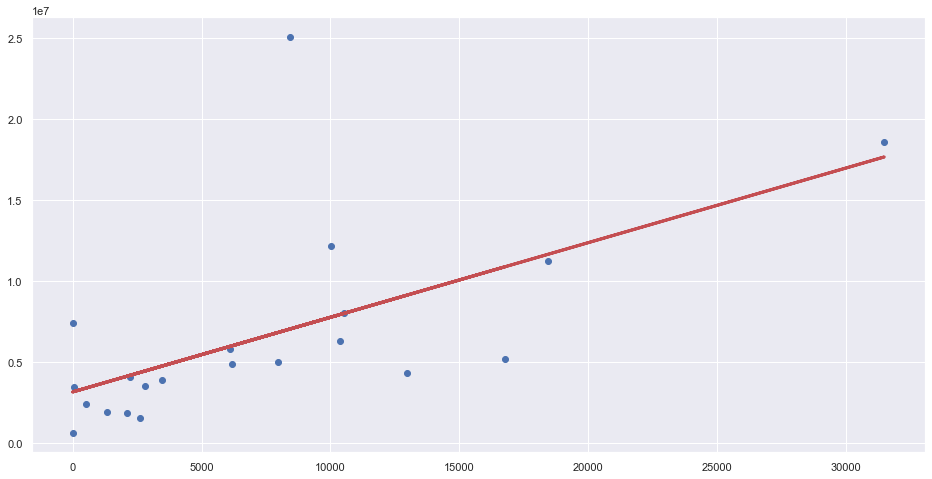

In [76]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [77]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

Explained Variance (R^2) 	: 0.36335274488079916


In [78]:
# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 21513612156166.41


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `40 - 59` in the Test dataset.

In [79]:
y_test_pred = linreg.predict(X_test)

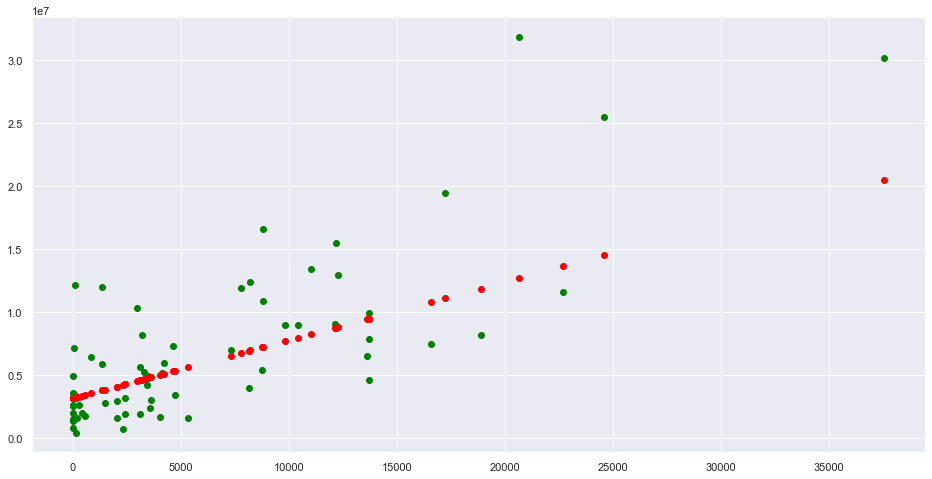

In [80]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [81]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

Explained Variance (R^2) 	: 0.5202540268460398


In [82]:
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 20163984303186.492


### Variable 7: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using 60 & Over

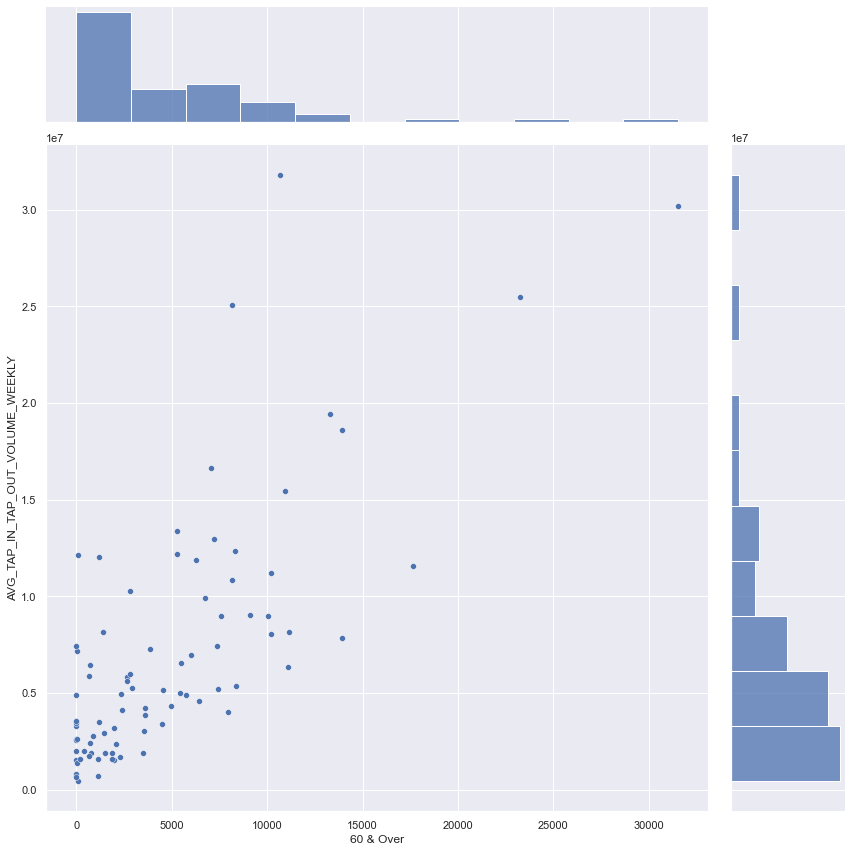

In [83]:
sb.jointplot(data = BusMRTGeoData_reg, x = '60 & Over', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [84]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['60 & Over'])

0.7503595742097162

In [85]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['60 & Over'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (21, 1) (21, 1)
Test Set  : (65, 1) (65, 1)


In [86]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [87]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [2729989.07236676]
Coefficients 	: a =  [[1011.04761832]]


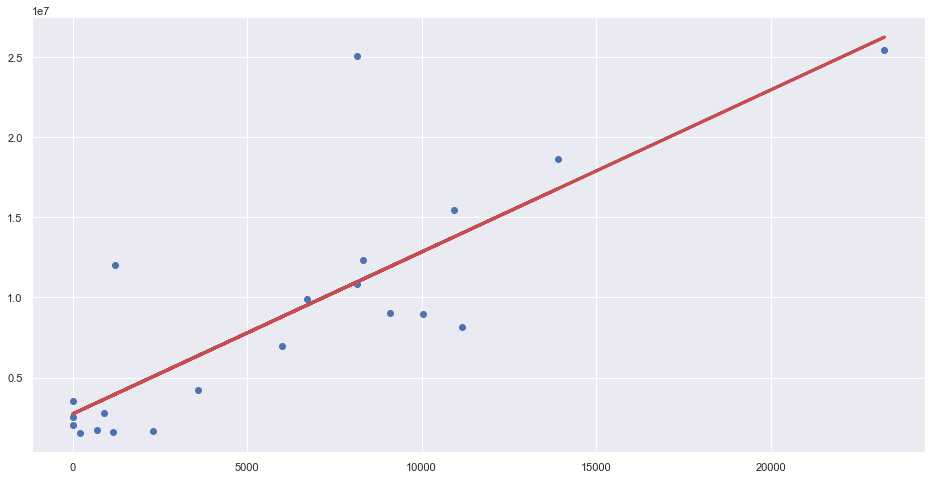

In [88]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [89]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

Explained Variance (R^2) 	: 0.6692234034203951


In [90]:
# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 17181535498635.023


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `60 & Over` in the Test dataset.

In [91]:
y_test_pred = linreg.predict(X_test)

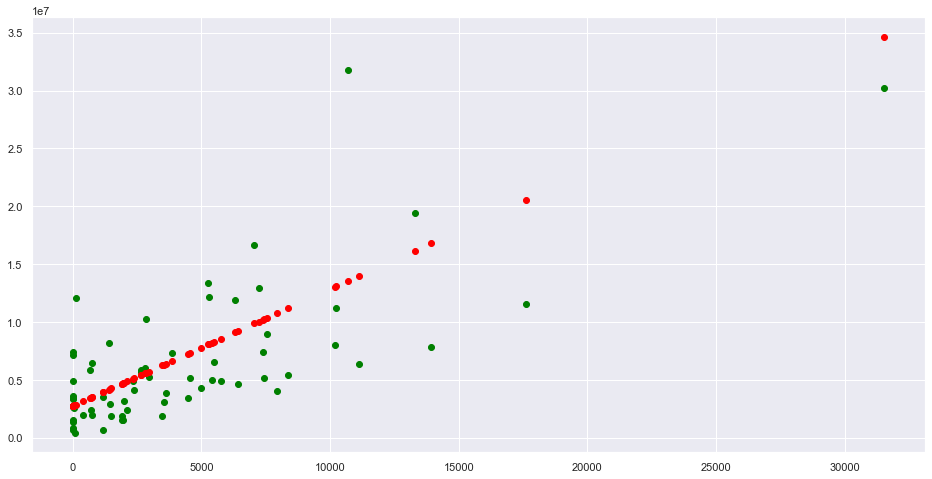

In [92]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [93]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

Explained Variance (R^2) 	: 0.4641883151585643


In [94]:
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 18660755378647.73


### Variable 8: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using Average Income

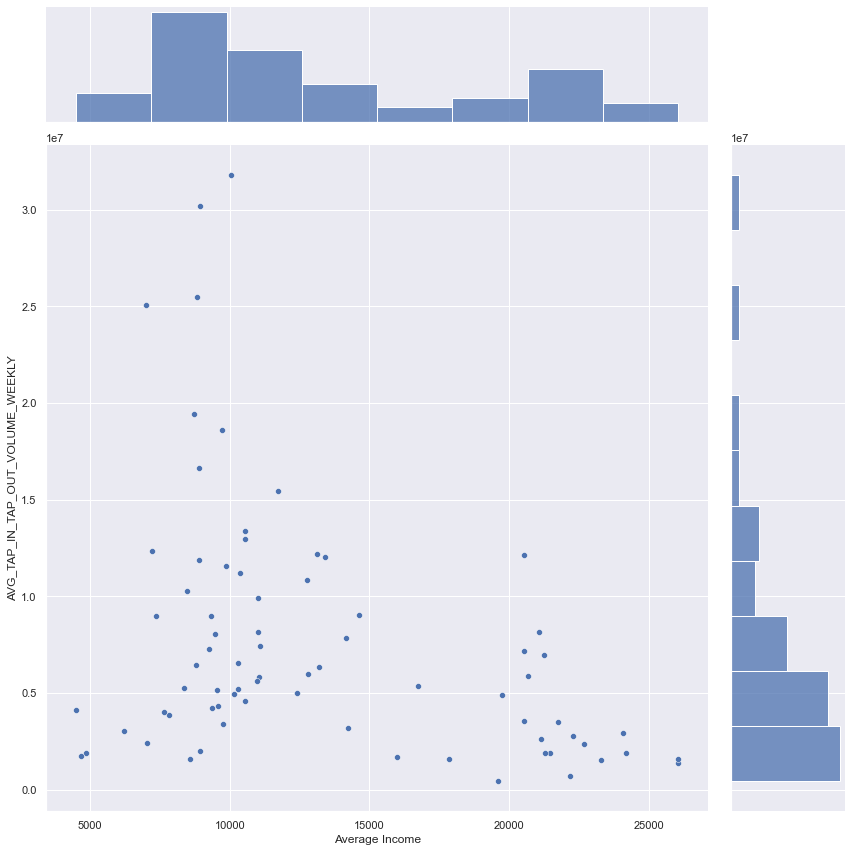

In [95]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Average Income', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [96]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Average Income'])

-0.3616475867114769

In [101]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Average Income'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (21, 1) (21, 1)
Test Set  : (65, 1) (65, 1)


In [102]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [103]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [6913407.36161934]
Coefficients 	: a =  [[52.05427361]]


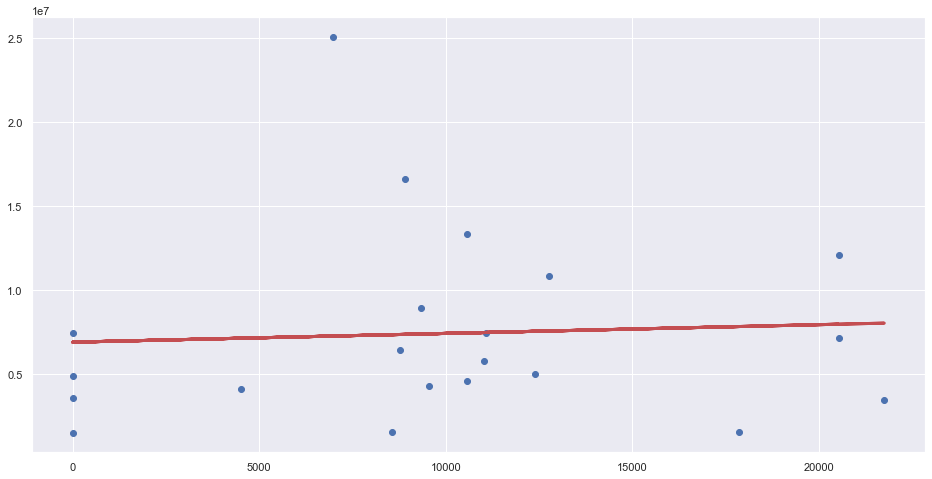

In [104]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [105]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

Explained Variance (R^2) 	: 0.003705310891422564


In [106]:
# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 30609198398625.047


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Average Income` in the Test dataset.

In [107]:
y_test_pred = linreg.predict(X_test)

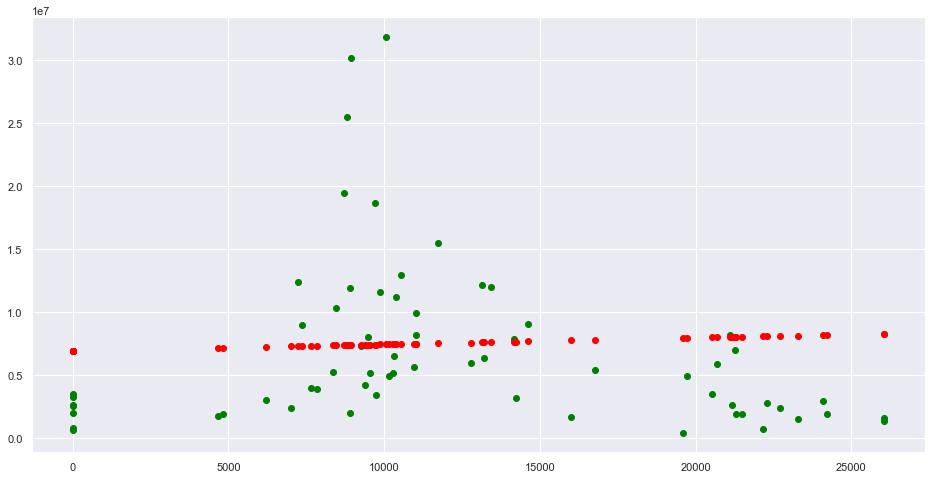

In [108]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [109]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

Explained Variance (R^2) 	: -0.03332223721918082


In [110]:
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 44441762728693.164
